# Data Analysis and Visualization in Python
## Starting With Data
Questions
* How can I import data in Python?
* What is Pandas?
* Why should I use Pandas to work with data?

Objectives
* Load the Python Data Analysis Library (Pandas).
* Use `read_csv` to read tabular data into Python.
* Describe what a DataFrame is in Python.
* Access and summarize data stored in a DataFrame.
* Perform basic mathematical operations and summary statistics on data in a Pandas DataFrame.
* Create simple plots.

## Working With Pandas DataFrames in Python

### Pandas in Python
One of the best options for working with tabular data in Python is to use the Python Data Analysis Library (a.k.a. Pandas). The Pandas library provides data structures, produces high quality plots with matplotlib and integrates nicely with other libraries that use NumPy (which is another Python library) arrays.

In [1]:
import pandas as pd

## Reading CSV Data Using Pandas
### So What’s a DataFrame?

In [2]:
# Note that pd.read_csv is used because we imported pandas as pd
pd.read_csv("data/surveys.csv")

,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight
0,1,7,16,1977,2,NL,M,32.0,NaN
1,2,7,16,1977,3,NL,M,33.0,NaN
2,3,7,16,1977,2,DM,F,37.0,NaN
3,4,7,16,1977,7,DM,M,36.0,NaN
4,5,7,16,1977,3,DM,M,35.0,NaN
...,...,...,...,...,...,...,...,...,...
35544,35545,12,31,2002,15,AH,NaN,NaN,NaN
35545,35546,12,31,2002,15,AH,NaN,NaN,NaN
35546,35547,12,31,2002,10,RM,F,15.0,14.0
35547,35548,12,31,2002,7,DO,M,36.0,51.0


In [3]:
surveys_df = pd.read_csv("data/surveys.csv")

In [4]:
surveys_df.head() # Displays the first several rows of a file

,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight
0,1,7,16,1977,2,NL,M,32.0,NaN
1,2,7,16,1977,3,NL,M,33.0,NaN
2,3,7,16,1977,2,DM,F,37.0,NaN
3,4,7,16,1977,7,DM,M,36.0,NaN
4,5,7,16,1977,3,DM,M,35.0,NaN


In [6]:
surveys_df.shape
# What format does it return the shape of the DataFrame in?

(35549, 9)

In [7]:
surveys_df.columns

Index(['record_id', 'month', 'day', 'year', 'plot_id', 'species_id', 'sex',
       'hindfoot_length', 'weight'],
      dtype='object')

In [9]:
#help(surveys_df)

In [10]:
# Compute descriptive statistics per column
print("Count:    ", surveys_df['weight'].count())
print("Mean:     ", surveys_df['weight'].mean())
print("Std Dev.: ", surveys_df['weight'].std())
print("Min:      ", surveys_df['weight'].min())
print("Max:      ", surveys_df['weight'].max())

Count:     32283
Mean:      42.672428212991356
Std Dev.:  36.63125947458358
Min:       4.0
Max:       280.0


In [13]:
# New column - Convert all weights from grams to kilograms
surveys_df['weight_kg'] = surveys_df['weight']/ 1000 
surveys_df.tail()

,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight,weight_kg
35544,35545,12,31,2002,15,AH,NaN,NaN,NaN,NaN
35545,35546,12,31,2002,15,AH,NaN,NaN,NaN,NaN
35546,35547,12,31,2002,10,RM,F,15.0,14.0,0.014
35547,35548,12,31,2002,7,DO,M,36.0,51.0,0.051
35548,35549,12,31,2002,5,NaN,NaN,NaN,NaN,NaN


## Types of Data
### Checking the format of our data

In [14]:
surveys_df.dtypes

record_id            int64
month                int64
day                  int64
year                 int64
plot_id              int64
species_id          object
sex                 object
hindfoot_length    float64
weight             float64
weight_kg          float64
dtype: object

In [15]:
surveys_df['month'].dtype

dtype('int64')

Native Python Type | Pandas Type | Description
-------------------|-------------|------------
`str`              | `object`    | The most general dtype. Will be assigned to your column if column has mixed types (numbers and strings).
`int`              | `int64`     | 64 bits integer
`float`            | `float64`   | Numeric characters with decimals. If a column contains numbers and NaNs(see below), pandas will default to float64.
 N/A               | `datetime64`| Values meant to hold time data.

### Working With Our Survey Data

In [16]:
# Summary of descriptive statistics
surveys_df.describe()

,record_id,month,day,year,plot_id,hindfoot_length,weight,weight_kg
count,35549.000000,35549.000000,35549.000000,35549.000000,35549.000000,31438.000000,32283.000000,32283.000000
mean,17775.000000,6.474022,16.105966,1990.475231,11.397001,29.287932,42.672428,0.042672
std,10262.256696,3.396583,8.256691,7.493355,6.799406,9.564759,36.631259,0.036631
min,1.000000,1.000000,1.000000,1977.000000,1.000000,2.000000,4.000000,0.004000
25%,8888.000000,4.000000,9.000000,1984.000000,5.000000,21.000000,20.000000,0.020000
50%,17775.000000,6.000000,16.000000,1990.000000,11.000000,32.000000,37.000000,0.037000
75%,26662.000000,9.000000,23.000000,1997.000000,17.000000,36.000000,48.000000,0.048000
max,35549.000000,12.000000,31.000000,2002.000000,24.000000,70.000000,280.000000,0.280000


In [17]:
surveys_df['month'] = surveys_df['month'].astype('str')
surveys_df['month'].dtype

dtype('O')

In [18]:
surveys_df['month'].describe()

count     35549
unique       12
top           7
freq       3633
Name: month, dtype: object

In [19]:
surveys_df['month'].unique()

array(['7', '8', '9', '10', '11', '12', '1', '2', '3', '4', '5', '6'],
      dtype=object)

In [21]:
surveys_df['year'].unique()

array([1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987,
       1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998,
       1999, 2000, 2001, 2002])

### Exercise - Calculating Statistics

`1`. What happens if we try to convert `weight` values to `int64` integers?

In [22]:
surveys_df['weight'].astype('int64')

ValueError: Cannot convert non-finite values (NA or inf) to integer

`2`. Try converting the column `plot_id` to native Python `float` data type.

In [23]:
surveys_df['plot_id'] = surveys_df['plot_id'].astype("float")
surveys_df['plot_id'].dtype

dtype('float64')

`3`. Create a list of unique site ID’s (`plot_id`) found in the surveys data. Call it `site_names`. How many unique sites are there in the data?

In [31]:
site_names = surveys_df['plot_id'].unique()
site_names.shape, site_names.shape[0]

((24,), 24)

`4`. What is the difference between `len(site_names)` and `surveys_df['plot_id'].nunique()`?

In [26]:
print(len(site_names))
print(surveys_df['plot_id'].nunique())

24
24


## Groups in Pandas

In [32]:
# Group data by sex
by_sex = surveys_df.groupby('sex')

In [33]:
# Summary statistics for all numeric columns by sex
by_sex.describe()

record_id                                                               \
        count          mean           std  min      25%      50%       75%   
sex                                                                          
F     15690.0  18036.412046  10423.089000  3.0  8917.50  18075.5  27250.00   
M     17348.0  17754.835601  10132.203323  1.0  8969.75  17727.5  26454.25   

                  day             ... weight        weight_kg            \
         max    count       mean  ...    75%    max     count      mean   
sex                               ...                                     
F    35547.0  15690.0  16.007138  ...   46.0  274.0   15303.0  0.042171   
M    35548.0  17348.0  16.184286  ...   49.0  280.0   16879.0  0.042995   

                                                 
          std    min   25%    50%    75%    max  
sex                                              
F    0.036848  0.004  0.02  0.034  0.046  0.274  
M    0.036185  0.004  0.02  0.039  0.049  0.280  

[2 rows x 56 columns]

In [34]:
# Provide the mean for each numeric column by sex
by_sex.mean()

,record_id,day,year,plot_id,hindfoot_length,weight,weight_kg
sex,,,,,,,
F,18036.412046,16.007138,1990.644997,11.440854,28.836780,42.170555,0.042171
M,17754.835601,16.184286,1990.480401,11.098282,29.709578,42.995379,0.042995


### Exercise - Grouping
`1`. How many recorded individuals are female `F`, and how many male `M`?

In [35]:
by_sex['record_id'].count()

sex
F    15690
M    17348
Name: record_id, dtype: int64

`2`. What happens when you group by two columns using the following syntax and then grab mean values:

In [36]:
by_site_sex = surveys_df.groupby(['plot_id','sex'])
by_site_sex.mean()

record_id        day         year  hindfoot_length     weight  \
plot_id sex                                                                     
1.0     F    18390.384434  15.338443  1990.933962        31.733911  46.311138   
        M    17197.740639  15.905936  1990.091324        34.302770  55.950560   
2.0     F    17714.753608  16.288660  1990.449485        30.161220  52.561845   
        M    18085.458042  15.440559  1990.756119        30.353760  51.391382   
3.0     F    19888.783875  16.161254  1992.013438        23.774044  31.215349   
        M    20226.767857  16.450000  1992.275000        23.833744  34.163241   
4.0     F    17489.205275  15.746560  1990.235092        33.249102  46.818824   
        M    18493.841748  16.507767  1991.000971        34.097959  48.888119   
5.0     F    12280.793169  15.722960  1986.485769        28.921844  40.974806   
        M    12798.426621  15.703072  1986.817406        29.694794  40.708551   
6.0     F    19406.503392  16.313433  1991.579376        26.981322  36.352288   
        M    17849.574607  16.091623  1990.556283        27.425591  36.867388   
7.0     F    19069.668657  15.313433  1991.441791        19.779553  20.006135   
        M    19188.729642  15.778502  1991.462541        20.536667  21.194719   
8.0     F    18920.276190  15.836905  1991.267857        32.187578  45.623011   
        M    19452.109868  15.854527  1991.686673        33.751059  49.641372   
9.0     F    16217.497069  15.555686  1989.303634        35.126092  53.618469   
        M    18000.710159  15.209163  1990.632470        34.175732  49.519309   
10.0    F    16001.496454  16.964539  1989.248227        18.641791  17.094203   
        M    15708.704225  16.739437  1989.007042        19.567164  19.971223   
11.0    F    16994.962287  16.283455  1989.836983        32.029299  43.515075   
        M    16933.909621  15.974733  1989.856171        32.078014  43.366197   
12.0    F    17457.966981  16.305660  1990.266981        30.975124  49.831731   
        M    17592.327500  16.367500  1990.400833        31.762489  48.909710   
13.0    F    18033.100318  16.229299  1990.619427        27.201014  40.524590   
        M    16969.044700  16.005109  1989.911877        27.893793  40.097754   
14.0    F    17097.145275  16.681241  1989.974612        32.973373  47.355491   
        M    17891.948598  16.504673  1990.587850        32.961802  45.159378   
15.0    F    20602.449064  16.162162  1992.523909        21.949891  26.670236   
        M    18104.019560  17.413203  1990.770171        21.803109  27.523691   
16.0    F    19002.445946  16.819820  1991.351351        23.144928  25.810427   
        M    18434.714286  16.622711  1990.926740        23.480916  23.811321   
17.0    F    18234.322870  15.892377  1990.785874        30.918536  48.176201   
        M    18857.651472  16.183286  1991.331434        32.227634  47.558853   
18.0    F    17940.875497  15.960265  1990.536424        26.690341  36.963514   
        M    15106.718850  16.797125  1988.551118        27.703072  43.546952   
19.0    F    21848.216475  15.226054  1993.417625        21.257937  21.978599   
        M    19470.779690  16.647160  1991.740103        21.071685  20.306878   
20.0    F    17510.769231  16.026154  1990.253846        27.069193  52.624406   
        M    16076.192496  16.375204  1989.243067        27.908451  44.197279   
21.0    F    22452.636661  16.307692  1993.878887        22.366554  25.974832   
        M    20120.399113  16.203991  1992.199557        21.736721  22.772622   
22.0    F    18499.695976  15.521610  1990.973174        34.108320  53.647059   
        M    18015.365527  16.682021  1990.650817        33.359746  54.572531   
23.0    F    15863.193939  16.036364  1989.024242        20.051948  20.564417   
        M    17091.338164  16.077295  1989.961353        19.850000  18.941463   
24.0    F    13702.224280  16.393004  1987.485597        26.993377  47.914405   
        M    15208.136082  16.971134  1988.6412

`3`. Summarize `weight` values for each site (`plot_id`) in your data. HINT: it is possible to select a column once the data has been grouped.

In [38]:
by_site = surveys_df.groupby(['plot_id'])
by_site['weight'].describe()

,count,mean,std,min,25%,50%,75%,max
plot_id,,,,,,,,
1.0,1903.0,51.822911,38.176670,4.0,30.0,44.0,53.0,231.0
2.0,2074.0,52.251688,46.503602,5.0,24.0,41.0,50.0,278.0
3.0,1710.0,32.654386,35.641630,4.0,14.0,23.0,36.0,250.0
4.0,1866.0,47.928189,32.886598,4.0,30.0,43.0,50.0,200.0
5.0,1092.0,40.947802,34.086616,5.0,21.0,37.0,48.0,248.0
6.0,1463.0,36.738893,30.648310,5.0,18.0,30.0,45.0,243.0
7.0,638.0,20.663009,21.315325,4.0,11.0,17.0,23.0,235.0
8.0,1781.0,47.758001,33.192194,5.0,26.0,44.0,51.0,178.0
9.0,1811.0,51.432358,33.724726,6.0,36.0,45.0,50.0,275.0


### Getting the Number of Records of One Species

In [39]:
surveys_df['species_id'].unique()

array(['NL', 'DM', 'PF', 'PE', 'DS', 'PP', 'SH', 'OT', 'DO', 'OX', 'SS',
       'OL', 'RM', nan, 'SA', 'PM', 'AH', 'DX', 'AB', 'CB', 'CM', 'CQ',
       'RF', 'PC', 'PG', 'PH', 'PU', 'CV', 'UR', 'UP', 'ZL', 'UL', 'CS',
       'SC', 'BA', 'SF', 'RO', 'AS', 'SO', 'PI', 'ST', 'CU', 'SU', 'RX',
       'PB', 'PL', 'PX', 'CT', 'US'], dtype=object)

In [40]:
surveys_df.groupby('species_id')['record_id'].count()['AB']

303

## Quick & Easy Plotting Data Using Pandas

<AxesSubplot:xlabel='plot_id'>

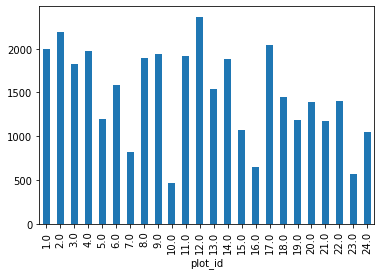

In [41]:
by_site['record_id'].count().plot(kind='bar')

### Exercise - Plotting Challenge
Create a `line` plot of the median `weight` per month.

<AxesSubplot:xlabel='month'>

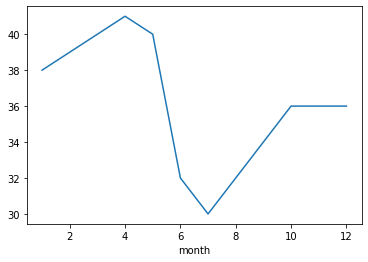

In [42]:
# Why is the following line necessary?
surveys_df['month'] = surveys_df['month'].astype('int64')
surveys_df.groupby('month')['weight'].median().plot(kind='line')

<AxesSubplot:xlabel='month'>

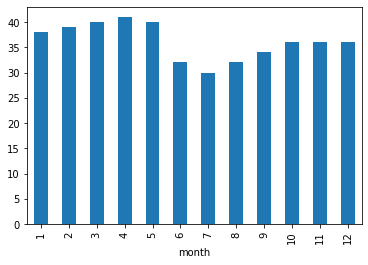

In [44]:
surveys_df.groupby('month')['weight'].median().plot(kind='bar')

## Summary Example

In [47]:
site_sex_totalw = by_site_sex['weight'].sum()
site_sex_totalw.head(16)

plot_id  sex
1.0      F      38253.0
         M      59979.0
2.0      F      50144.0
         M      57250.0
3.0      F      27251.0
         M      28253.0
4.0      F      39796.0
         M      49377.0
5.0      F      21143.0
         M      23326.0
6.0      F      26210.0
         M      27245.0
7.0      F       6522.0
         M       6422.0
8.0      F      37274.0
         M      47755.0
Name: weight, dtype: float64

In [48]:
# Change the right-most categorical values into columns
sst = site_sex_totalw.unstack()
sst

sex,F,M
plot_id,,
1.0,38253.0,59979.0
2.0,50144.0,57250.0
3.0,27251.0,28253.0
4.0,39796.0,49377.0
5.0,21143.0,23326.0
6.0,26210.0,27245.0
7.0,6522.0,6422.0
8.0,37274.0,47755.0
9.0,44128.0,48727.0


Text(0, 0.5, 'Weight (g)')

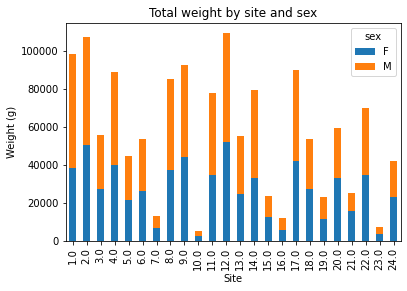

In [49]:
s_plot = sst.plot(kind='bar', stacked=True,
                  title="Total weight by site and sex")
s_plot.set_xlabel("Site")
s_plot.set_ylabel("Weight (g)")